In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/combined_data.csv')

In [ ]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,9.9,223.0,160.0,77.27,1,0.0,1.0,-69.14,3,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,9.9,NaN,NaN,77.27,1,0.0,1.0,-69.14,4,0
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,5,0
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,6,0
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,7,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Load Your Dataset
# Replace 'your_dataset.csv' with the path to your dataset file


# 2. Handle Missing Values (if necessary)
# Example: Impute missing values with mean
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

# 3. Split Your Data
X = data.drop(columns=['SepsisLabel'])
y = data['SepsisLabel']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and Train Your Classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# 6. Make Predictions
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

# 7. Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 8. Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
data.isnull().sum()

HR                   61189
O2Sat                95079
Temp                523314
SBP                 120201
MAP                  80858
DBP                 380297
Resp                 77258
EtCO2               790215
BaseExcess          707834
HCO3                726598
FiO2                678060
pH                  699600
PaCO2               720927
SaO2                751055
AST                 778395
BUN                 725739
Alkalinephos        778683
Calcium             750897
Chloride            724438
Creatinine          737728
Bilirubin_direct    789033
Glucose             693559
Lactate             763072
Magnesium           728734
Phosphate           750319
Potassium           704379
Bilirubin_total     780522
TroponinI           789250
Hct                 697157
Hgb                 720394
PTT                 751909
WBC                 730867
Fibrinogen          784185
Platelets           738716
Age                      0
Gender                   0
Unit1               386165
U

In [ ]:
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data.shape

(790215, 41)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790215 entries, 0 to 790214
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                729026 non-null  float64
 1   O2Sat             695136 non-null  float64
 2   Temp              266901 non-null  float64
 3   SBP               670014 non-null  float64
 4   MAP               709357 non-null  float64
 5   DBP               409918 non-null  float64
 6   Resp              712957 non-null  float64
 7   EtCO2             0 non-null       float64
 8   BaseExcess        82381 non-null   float64
 9   HCO3              63617 non-null   float64
 10  FiO2              112155 non-null  float64
 11  pH                90615 non-null   float64
 12  PaCO2             69288 non-null   float64
 13  SaO2              39160 non-null   float64
 14  AST               11820 non-null   float64
 15  BUN               64476 non-null   float64
 16  Alkalinephos      11

In [ ]:
data.drop('EtCO2',axis=1,inplace=True)

In [ ]:
from pylab import rcParams

In [ ]:
missing = (data.isnull().sum() / data.shape[0]) * 100
missing

HR                   7.743336
O2Sat               12.032042
Temp                66.224255
SBP                 15.211177
MAP                 10.232405
DBP                 48.125763
Resp                 9.776833
BaseExcess          89.574863
HCO3                91.949406
FiO2                85.807027
pH                  88.532868
PaCO2               91.231753
SaO2                95.044387
AST                 98.504205
BUN                 91.840702
Alkalinephos        98.540650
Calcium             95.024392
Chloride            91.676063
Creatinine          93.357884
Bilirubin_direct    99.850420
Glucose             87.768392
Lactate             96.565112
Magnesium           92.219712
Phosphate           94.951247
Potassium           89.137640
Bilirubin_total     98.773372
TroponinI           99.877881
Hct                 88.223711
Hgb                 91.164303
PTT                 95.152459
WBC                 92.489639
Fibrinogen          99.236917
Platelets           93.482913
Age       

Text(0.5, 1.0, 'missing data percentage')

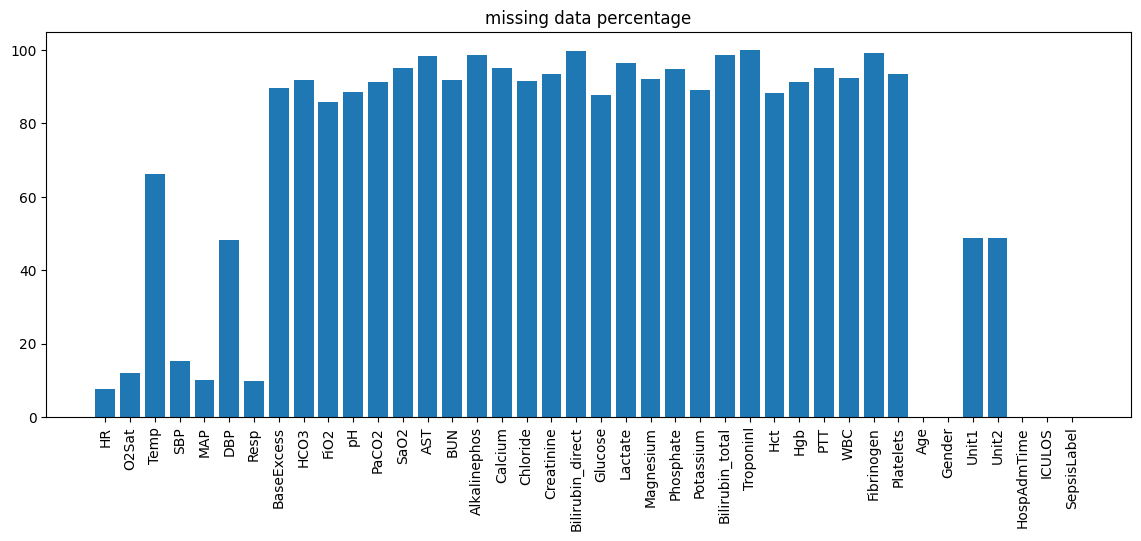

In [ ]:
rcParams['figure.figsize'] = 14, 5
_ = plt.bar(missing.index, missing)
_ = plt.xticks(missing.index, rotation=90)

plt.savefig('missing data percentage.png',dpi=300, bbox_inches='tight')
plt.title("missing data percentage")

In [ ]:
selected_cols = list(missing[missing < 90].index)
selected_cols

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'BaseExcess',
 'FiO2',
 'pH',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [ ]:
fdata = data[selected_cols]
fdata.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,1.0,1.0,7.40,107.0,3.7,27.9,77.27,1,0.0,1.0,-69.14,3,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,1.0,0.5,7.40,NaN,NaN,27.9,77.27,1,0.0,1.0,-69.14,4,0
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,5,0
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,-3.0,NaN,7.34,112.5,4.2,NaN,77.27,1,0.0,1.0,-69.14,6,0
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,-3.0,NaN,7.34,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,7,0


In [ ]:
fdata.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'FiO2', 'pH', 'Glucose', 'Potassium', 'Hct', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [ ]:
categorical=fdata.dtypes==object
categorical['Unit1']= True
categorical['Unit2']= True
categorical['Gender']= True


In [ ]:
categorical

HR             False
O2Sat          False
Temp           False
SBP            False
MAP            False
DBP            False
Resp           False
BaseExcess     False
FiO2           False
pH             False
Glucose        False
Potassium      False
Hct            False
Age            False
Gender          True
Unit1           True
Unit2           True
HospAdmTime    False
ICULOS         False
SepsisLabel    False
dtype: bool

In [ ]:
cat_vars = list(categorical[categorical].index)
cont_vars = list(categorical[~categorical].index)

In [ ]:
cont_vars.pop(-1)

'SepsisLabel'

In [ ]:
import seaborn as sns

In [ ]:
cont_vars

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'BaseExcess',
 'FiO2',
 'pH',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'HospAdmTime',
 'ICULOS']

In [ ]:
fdata.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,1.0,1.0,7.40,107.0,3.7,27.9,77.27,1,0.0,1.0,-69.14,3,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,1.0,0.5,7.40,NaN,NaN,27.9,77.27,1,0.0,1.0,-69.14,4,0
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,5,0
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,-3.0,NaN,7.34,112.5,4.2,NaN,77.27,1,0.0,1.0,-69.14,6,0
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,-3.0,NaN,7.34,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,7,0


<ipython-input-208-de90cb023391>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s=sns.distplot(fdata[var].dropna(), axlabel=var);
<ipython-input-208-de90cb023391>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s=sns.distplot(fdata[var].dropna(), axlabel=var);
<ipython-input-208-de90cb023391>:6: UserWarning: 

`distpl

KeyboardInterrupt: 

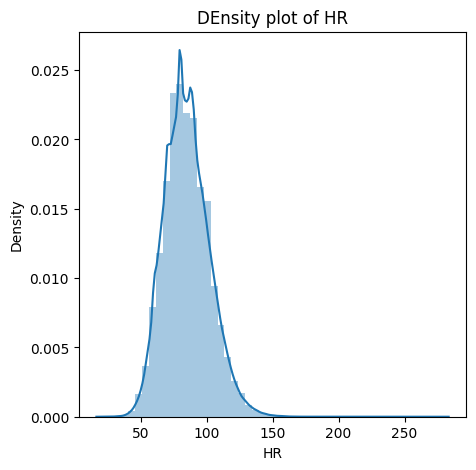

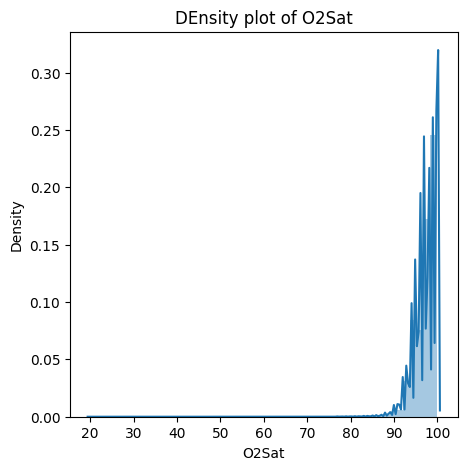

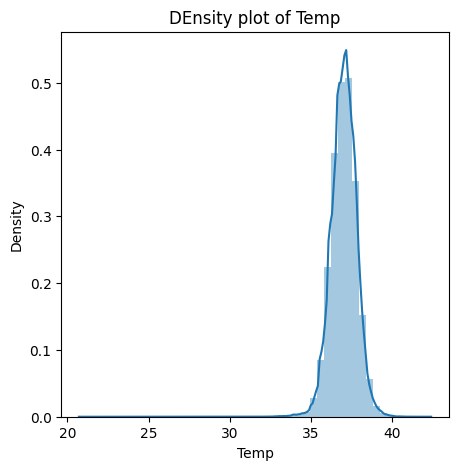

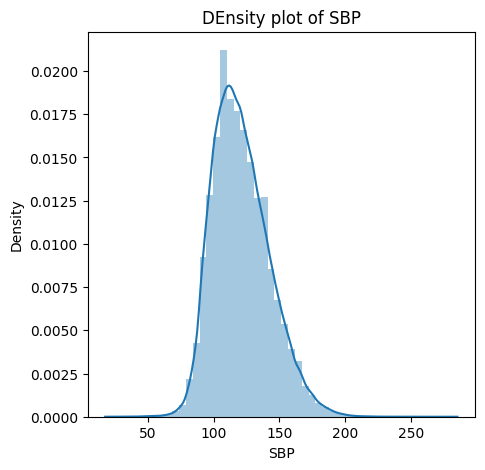

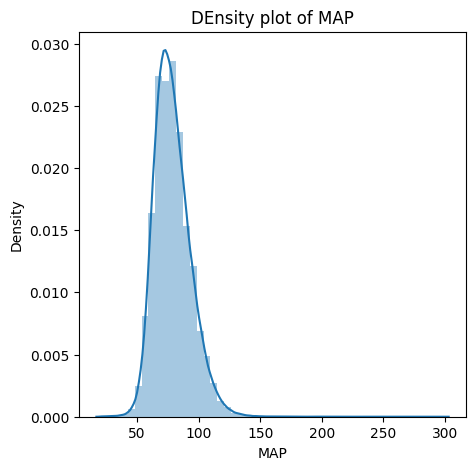

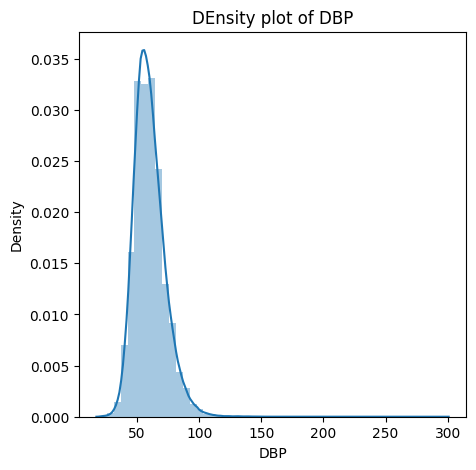

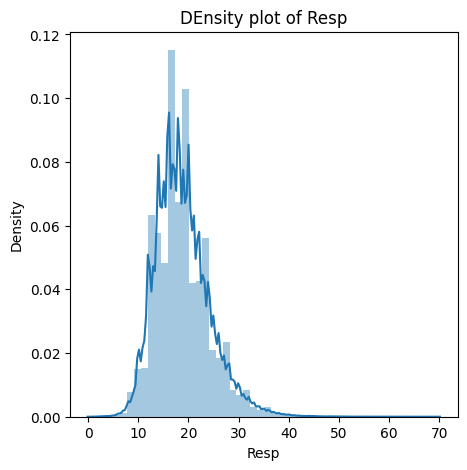

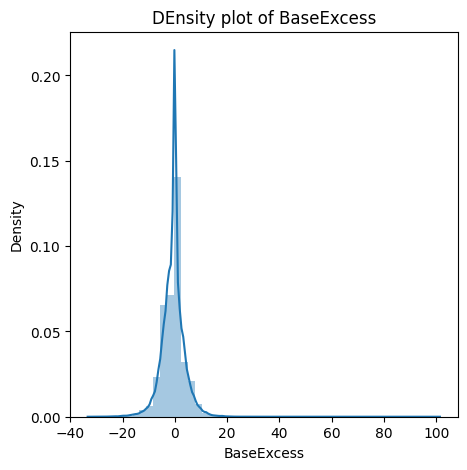

<Figure size 500x500 with 0 Axes>

In [ ]:
s=[]
rcParams['figure.figsize'] = 5, 5
for i,var in enumerate(cont_vars):
  plt.figure(i)
  plt.title("DEnsity plot of " + str(var))
  s=sns.distplot(fdata[var].dropna(), axlabel=var);

In [ ]:
for i,var in enumerate(cont_vars):
    figure=s.get_figure()
    figure.savefig("output"+str(var))
    print(s)

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


In [ ]:
data1=data.Bilirubin_direct

<ipython-input-211-6c9109c253d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1, bins=20)


<Axes: xlabel='Bilirubin_direct', ylabel='Density'>

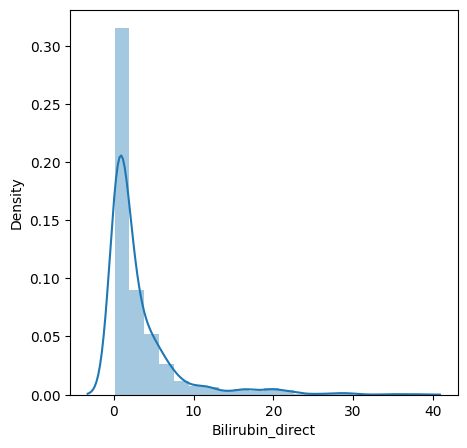

In [ ]:
sns.distplot(data1, bins=20)

In [ ]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):

        self.mu = mu
        self.sigma = sigma
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

In [ ]:
df1=data.Bilirubin_direct
best_single = Gaussian(np.mean(df1), np.std(df1))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

Best single Gaussian: μ = 3.1, σ = 4.6


In [ ]:
fdata.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,1.0,1.0,7.40,107.0,3.7,27.9,77.27,1,0.0,1.0,-69.14,3,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,1.0,0.5,7.40,NaN,NaN,27.9,77.27,1,0.0,1.0,-69.14,4,0
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,5,0
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,-3.0,NaN,7.34,112.5,4.2,NaN,77.27,1,0.0,1.0,-69.14,6,0
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,-3.0,NaN,7.34,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,7,0


In [ ]:
fdata.skew()

HR             0.418869
O2Sat         -4.570025
Temp          -0.433448
SBP            0.551178
MAP            1.127452
DBP            1.040330
Resp           0.872567
BaseExcess     0.008424
FiO2           2.952150
pH            -0.905032
Glucose        3.692394
Potassium      1.753758
Hct            0.537766
Age           -0.619293
Gender        -0.314711
Unit1         -0.028405
Unit2          0.028405
HospAdmTime   -9.032119
ICULOS         4.044087
SepsisLabel    6.567850
dtype: float64

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Load your dataset


# Define columns to normalize
columns_to_normalize = ['O2Sat', 'FiO2', 'Glucose','HospAdmTime','ICULOS','HR','Temp','SBP','MAP','DBP','Resp','Hct','Age']

# Initialize MinMaxScaler
scaler = StandardScaler()

# Apply normalization only to specified columns
fdata[columns_to_normalize] = scaler.fit_transform(fdata[columns_to_normalize])

# Alternatively, you can use transform() if you have already fitted the scaler
# df[columns_to_normalize] = scaler.transform(df[columns_to_normalize])

# Now df contains normalized values for the specified columns


<ipython-input-26-84f515262ed4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdata[columns_to_normalize] = scaler.fit_transform(fdata[columns_to_normalize])


In [ ]:
fdata.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,-0.294282,0.940017,-0.675031,0.001749,-1.380438,-1.510075,-0.977336,1.0,2.548859,7.40,-0.515849,3.7,-0.569253,0.883448,1,0.0,1.0,-0.109802,-0.858380,0
1,-0.530404,0.940017,-0.995414,-0.358372,-1.181023,-1.470307,-1.255333,1.0,-0.141218,7.40,NaN,NaN,-0.569253,0.883448,1,0.0,1.0,-0.109802,-0.822907,0
2,-0.294282,0.940017,-0.995414,0.547739,-0.483072,-1.092506,-1.255333,NaN,NaN,NaN,NaN,NaN,NaN,0.883448,1,0.0,1.0,-0.109802,-0.787435,0
3,-0.412343,0.940017,-1.187644,-0.811427,-1.380438,-1.351001,-1.255333,-3.0,NaN,7.34,-0.409226,4.2,NaN,0.883448,1,0.0,1.0,-0.109802,-0.751963,0
4,-0.648465,0.940017,-1.315797,0.361870,-0.616015,-1.231696,-1.162668,-3.0,NaN,7.34,NaN,NaN,NaN,0.883448,1,0.0,1.0,-0.109802,-0.716490,0


In [ ]:
fdata.skew()

HR             0.418869
O2Sat         -4.570025
Temp          -0.433448
SBP            0.551178
MAP            1.127452
DBP            1.040330
Resp           0.872567
BaseExcess     0.008424
FiO2           2.952150
pH            -0.905032
Glucose        3.692394
Potassium      1.753758
Hct            0.537766
Age           -0.619293
Gender        -0.314711
Unit1         -0.028405
Unit2          0.028405
HospAdmTime   -9.032119
ICULOS         4.044087
SepsisLabel    6.567850
dtype: float64

In [ ]:
fdata.drop(columns=['HospAdmTime'],inplace=True)

<ipython-input-29-113dc6154677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdata.drop(columns=['HospAdmTime'],inplace=True)


In [ ]:
fdata.skew()

HR             0.418869
O2Sat         -4.570025
Temp          -0.433448
SBP            0.551178
MAP            1.127452
DBP            1.040330
Resp           0.872567
BaseExcess     0.008424
FiO2           2.952150
pH            -0.905032
Glucose        3.692394
Potassium      1.753758
Hct            0.537766
Age           -0.619293
Gender        -0.314711
Unit1         -0.028405
Unit2          0.028405
ICULOS         4.044087
SepsisLabel    6.567850
dtype: float64

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Identify columns with missing values
columns_with_missing_values = fdata.columns[fdata.isnull().any()].tolist()

# Split dataset into two parts: one with missing values and one without
df_missing = fdata[fdata[columns_with_missing_values].isnull().any(axis=1)]
df_complete = fdata.dropna(subset=columns_with_missing_values)

# Define features (X) and target variable (y)
X_train = df_complete.drop(columns=columns_with_missing_values)
y_train = df_complete[columns_with_missing_values]

X_test = df_missing.drop(columns=columns_with_missing_values)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict missing values
predicted_values = rf_model.predict(X_test)

# Replace missing values with predicted values
fdata.loc[df_missing.index, columns_with_missing_values] = predicted_values

# Now df contains missing values imputed using Random Forest regression


In [ ]:
# import pandas as pd
# from fancyimpute import IterativeImputer

# # Load your dataset (replace 'your_dataset.csv' with the path to your dataset)
# #df = pd.read_csv('/content/combined_data.csv')

# # Initialize MICE imputer
# imputer = IterativeImputer()

# # Perform multiple imputation
# imputed_data = imputer.fit_transform(fdata)

# # Convert the imputed data back to a DataFrame
# imputed_df = pd.DataFrame(imputed_data, columns=fdata.columns)

# # Now 'imputed_df' contains the dataset with missing values imputed using MICE


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
fdata.isnull().sum()

HR             0
O2Sat          0
Temp           0
SBP            0
MAP            0
DBP            0
Resp           0
BaseExcess     0
FiO2           0
pH             0
Glucose        0
Potassium      0
Hct            0
Age            0
Gender         0
Unit1          0
Unit2          0
ICULOS         0
SepsisLabel    0
dtype: int64

In [ ]:
fdata.corr().SepsisLabel

HR             0.065267
O2Sat         -0.032299
Temp          -0.016278
SBP            0.014617
MAP           -0.003531
DBP            0.022078
Resp           0.039304
BaseExcess    -0.060323
FiO2           0.058740
pH            -0.065282
Glucose        0.053007
Potassium     -0.000118
Hct           -0.027308
Age           -0.002127
Gender         0.009625
Unit1          0.075483
Unit2         -0.075483
ICULOS         0.150257
SepsisLabel    1.000000
Name: SepsisLabel, dtype: float64

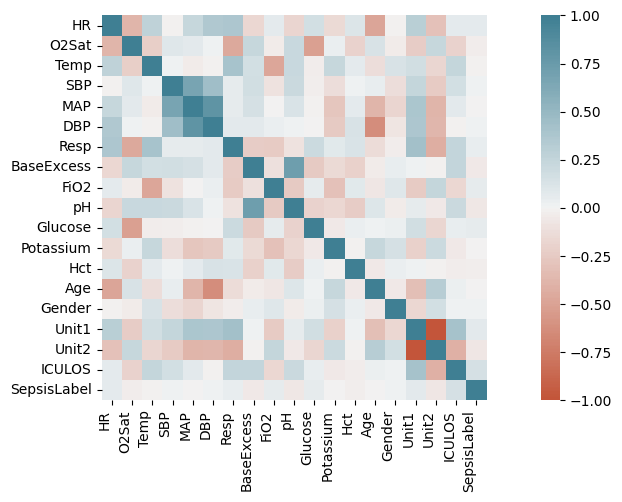

In [ ]:
corr = fdata.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
#     plt.savefig('corrplot.png', dpi=300, bbox_inches='tight')
);

In [ ]:
corr=fdata.corr().SepsisLabel

In [ ]:
fdata_corr=pd.DataFrame(corr)

In [ ]:
fdata_corr.sort_values(ascending=False,by="SepsisLabel")

,SepsisLabel
SepsisLabel,1.000000
ICULOS,0.150257
Unit1,0.075483
HR,0.065267
FiO2,0.058740
Glucose,0.053007
Resp,0.039304
DBP,0.022078
SBP,0.014617
Gender,0.009625


In [ ]:
fdata.shape

(790215, 19)

In [ ]:
fdata['SepsisLabel'].value_counts()

SepsisLabel
0    773079
1     17136
Name: count, dtype: int64

In [ ]:
fdata['SepsisLabel'].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
790210    0
790211    0
790212    0
790213    0
790214    0
Name: SepsisLabel, Length: 790215, dtype: int64

In [ ]:
fdata.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,ICULOS,SepsisLabel
0,-0.294282,0.940017,-0.675031,0.001749,-1.380438,-1.510075,-0.977336,1.00,2.548859,7.4000,-0.515849,3.700,-0.569253,0.883448,1,0.0,1.0,-0.858380,0
1,0.049275,0.424339,-1.336302,-0.159725,-0.301604,-0.303896,-1.439738,1.38,0.886391,7.4287,-0.446447,4.142,-0.179582,0.883448,1,0.0,1.0,-0.822907,0
2,-0.134605,0.752654,-1.056928,-0.363948,-0.277675,-0.223564,-1.099655,0.98,2.005463,7.4105,-0.356108,3.779,0.571348,0.883448,1,0.0,1.0,-0.787435,0
3,-0.060817,0.558415,-0.833556,-0.087003,0.194606,0.003117,-1.197881,-0.19,1.090837,7.3905,-0.031778,4.145,0.540166,0.883448,1,0.0,1.0,-0.751963,0
4,-0.100662,-0.923300,-0.181000,0.006628,0.083931,0.028171,-1.029229,0.25,0.047087,7.3333,0.410710,4.223,-0.794706,0.883448,1,0.0,1.0,-0.716490,0


In [ ]:
X_int=fdata.drop('SepsisLabel',axis=1).values
Y_int=fdata['SepsisLabel'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_int,Y_int, test_size=0.2,random_state=42)


In [ ]:
import xgboost as xgb


test_loss=[]
train_loss=[]
for i in range(100,1000,100):
    xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=i,seed=1)
    xg.fit(X_train,y_train)
    predict=xg.predict(X_test)
    test_loss.append(xg.score(X_test, y_test))
    train_loss.append(xg.score(X_train,y_train))

In [ ]:
for i in test_loss:
    print(i)

0.994843175591453
0.9968616136114855
0.9976272280328772
0.9978613415336333
0.9980448358990908
0.9981334193858633
0.9982156754807237
0.9982030206968989
0.9982473124402852


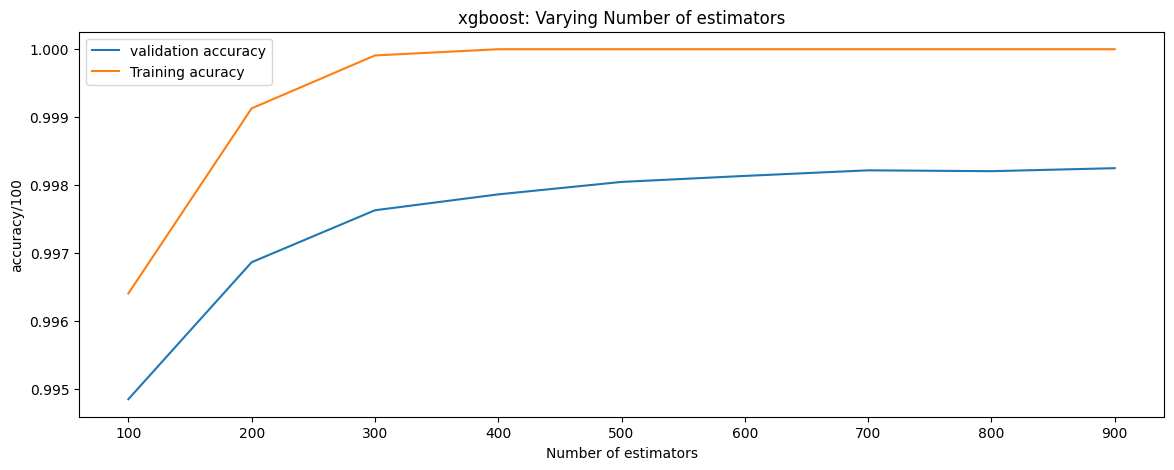

In [ ]:
n_estimators=[100,200,300,400,500,600,700,800,900]
plt.title('xgboost: Varying Number of estimators')
plt.plot(n_estimators, test_loss, label = 'validation accuracy')
plt.plot(n_estimators, train_loss, label = 'Training acuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('accuracy/100')
plt.savefig('xgbplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,predict)
roc

0.9607290795255968

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = predict
results = confusion_matrix(actual, predicted)
print("Confusion Matrix :")
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[154562      4]
 [   273   3204]]
Accuracy Score : 0.9982473124402852
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154566
           1       1.00      0.92      0.96      3477

    accuracy                           1.00    158043
   macro avg       1.00      0.96      0.98    158043
weighted avg       1.00      1.00      1.00    158043



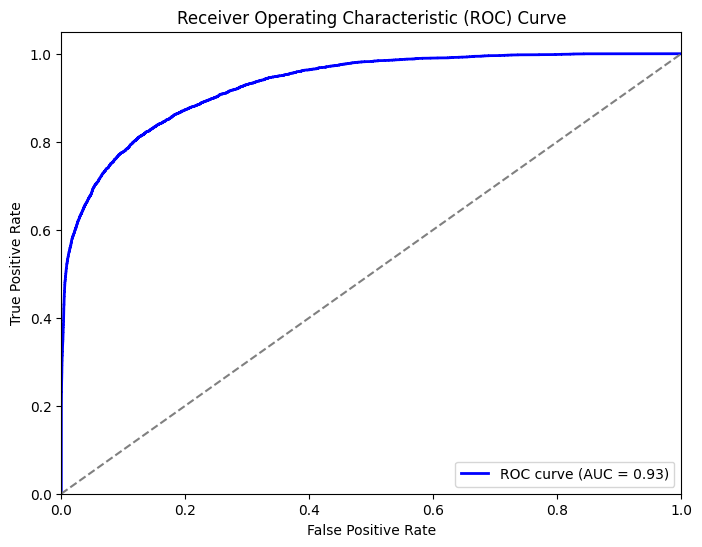

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

# Generate synthetic data
X=fdata.drop(columns=['SepsisLabel'])
y=fdata['SepsisLabel']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost classifier
bst = xgb.train(params, dtrain, num_round)

# Predict probabilities for the test set
y_probs = bst.predict(dtest)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [237065, 158043]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' is your feature matrix and 'y' is your target variable
X=fdata.drop(columns=['SepsisLabel'])
y=fdata['SepsisLabel']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Train the classifier
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_classifier.predict(X_test)

from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,y_pred)
print("ROC_AUC_SCORE:",roc)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ROC_AUC_SCORE: 0.5111448017040605
Accuracy: 0.977253026075182
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154566
           1       0.29      0.02      0.04      3477

    accuracy                           0.98    158043
   macro avg       0.63      0.51      0.52    158043
weighted avg       0.96      0.98      0.97    158043

Confusion Matrix:
[[154366    200]
 [  3395     82]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


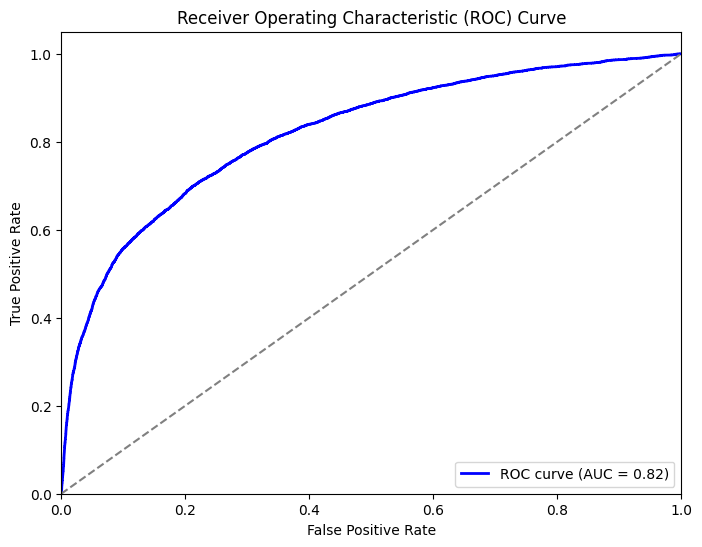

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Generate synthetic data
X=fdata.drop(columns=['SepsisLabel'])
y=fdata['SepsisLabel']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
imputed_df.skew()

HR             0.430039
O2Sat         -4.738163
Temp          -0.554681
SBP            0.617559
MAP            1.150556
DBP            0.915569
Resp           0.906363
BaseExcess    -0.741241
FiO2           2.624674
pH            -1.328373
Glucose        4.864330
Potassium      1.853774
Hct            0.866316
Age           -0.619293
Gender        -0.314711
Unit1         -0.039724
Unit2          0.039724
HospAdmTime   -9.032157
ICULOS         4.044087
SepsisLabel    6.567850
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
test_loss2=[]
train_loss2=[]
for i in range (100,1000,100):
    clf = RandomForestClassifier(n_estimators=300, max_depth=1, random_state=13, min_samples_leaf=1)
    clf.fit(X_train, y_train)
    predict=clf.predict(X_test)
    test_loss2.append(clf.score(X_test, y_test))
    train_loss2.append(clf.score(X_train,y_train))

KeyboardInterrupt: 

In [ ]:
for i in test_loss2:
    print(i)

In [ ]:
plt.title('random_forset: Varying Number of estimators')
plt.plot(n_estimators, test_loss2, label = 'Test accuracy')
plt.plot(n_estimators, train_loss2, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('accuracy/100')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,predict)
roc

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = predict
results = confusion_matrix(actual, predicted)
print("Confusion Matrix :")
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

In [ ]:
from sklearn.metrics import roc_curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
probs = predict
# probs = probs[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur(fper, tper)
plt.savefig('roc.png', dpi=300, bbox_inches='tight')

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = imputed_df.drop(columns=['SepsisLabel'])  # Replace 'target_column' with the name of your target variable column
y = imputed_df['SepsisLabel']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression Classifier
clf = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.title("Train and Test Accuracy of Logistic Regression Classifier")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Load dataset
X = imputed_df.drop(columns=['SepsisLabel'])  # Replace 'target_column' with the name of your target variable column
y = imputed_df['SepsisLabel']

# Binary classification task: classify '5' vs 'not 5'
#y_binary = (y == 5).astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression Classifier
clf = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities for positive class
y_scores = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' is your feature matrix and 'y' is your target variable
X=fdata.drop(columns=['SepsisLabel'])
y=fdata['SepsisLabel']# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,y_pred)
print("ROC_AUC_SCORE:",roc)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ROC_AUC_SCORE: 0.5906469227980123
Accuracy: 0.960915700157552
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    154566
           1       0.17      0.20      0.19      3477

    accuracy                           0.96    158043
   macro avg       0.58      0.59      0.58    158043
weighted avg       0.96      0.96      0.96    158043

Confusion Matrix:
[[151159   3407]
 [  2770    707]]


In [ ]:
a=data[['HR','O2Sat','SBP','MAP','DBP','Resp','SepsisLabel']]

In [ ]:
b=data[['BaseExcess','HCO3','FiO2', 'pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate','Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb',
        'PTT','WBC','Fibrinogen','Platelets','SepsisLabel']]

In [ ]:
ab=data[['HR','O2Sat','SBP','MAP','DBP','Resp','SepsisLabel','BaseExcess','HCO3','FiO2', 'pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate','Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb',
        'PTT','WBC','Fibrinogen','Platelets',]]

In [ ]:
c=data[[ 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel']]

In [ ]:
ac=data[['HR','O2Sat','SBP','MAP','DBP','Resp','SepsisLabel','Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS',]]

In [ ]:
bc=data[['BaseExcess','HCO3','FiO2', 'pH','Calcium','Chloride','Bilirubin_direct','Glucose','Lactate','Magnesium','Phosphate','Potassium','Hct','Hgb',
        'PTT','WBC','Fibrinogen','Platelets','Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel']]

In [ ]:
a.head()

,HR,O2Sat,SBP,MAP,DBP,Resp,SepsisLabel
0,80.0,100.0,121.00,58.0,41.00,13.5,0
1,76.0,100.0,113.25,61.0,41.50,12.0,0
2,80.0,100.0,132.75,71.5,46.25,12.0,0
3,78.0,100.0,103.50,58.0,43.00,12.0,0
4,74.0,100.0,128.75,69.5,44.50,12.5,0


In [ ]:
a.isnull().sum()

HR              61189
O2Sat           95079
SBP            120201
MAP             80858
DBP            380297
Resp            77258
SepsisLabel         0
dtype: int64

In [ ]:
X_int=a.drop(['SepsisLabel'],axis=1).values
Y_int=a['SepsisLabel'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_int,Y_int, test_size=0.2,random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

steps = [
    ('imp', SimpleImputer(strategy="mean")),
    ('clf', XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=1))
]
pipeline = Pipeline(steps)



pipeline.fit(X_train, y_train)
predict2=pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.9777022709009573

In [ ]:
from sklearn.metrics import roc_auc_score
roc2=roc_auc_score(y_test,predict2)
roc2

0.5020970376158702

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = predict2
results = confusion_matrix(actual, predicted)
print("Confusion Matrix :")
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[154503     63]
 [  3461     16]]
Accuracy Score : 0.9777022709009573
Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154566
           1       0.20      0.00      0.01      3477

    accuracy                           0.98    158043
   macro avg       0.59      0.50      0.50    158043
weighted avg       0.96      0.98      0.97    158043



In [ ]:
from sklearn.metrics import roc_curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('rocb.png', dpi=300, bbox_inches='tight')
    plt.show()


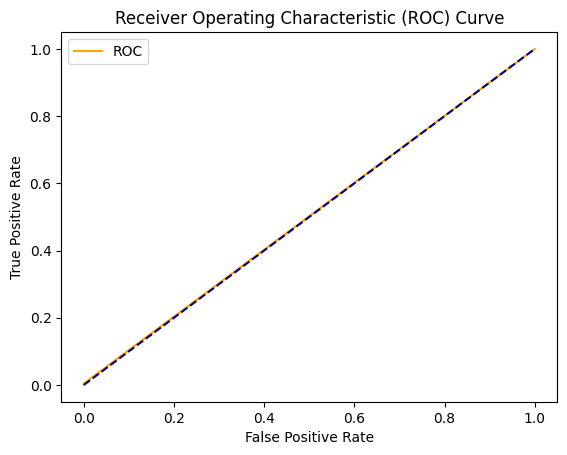

In [ ]:
import matplotlib.pyplot as plt
probs = predict2
# probs = probs[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur(fper, tper)
# plt.savefig('rocb.png', dpi=300, bbox_inches='tight')

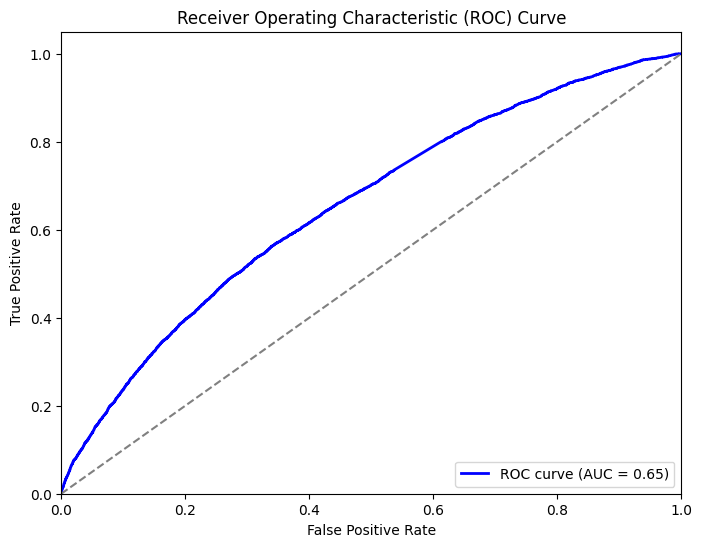

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

# Generate synthetic data
X=a.drop(columns=['SepsisLabel'])
y=a['SepsisLabel']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost classifier
bst = xgb.train(params, dtrain, num_round)

# Predict probabilities for the test set
y_probs = bst.predict(dtest)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
b.head()

,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
0,1.0,25.0,1.0,7.40,47.0,77.0,NaN,53.0,NaN,NaN,...,3.7,NaN,NaN,27.9,8.8,38.1,9.9,223.0,160.0,0
1,1.0,25.0,0.5,7.40,NaN,NaN,NaN,53.0,NaN,NaN,...,NaN,NaN,NaN,27.9,8.8,NaN,9.9,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-3.0,NaN,NaN,7.34,42.0,NaN,NaN,NaN,NaN,NaN,...,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,-3.0,NaN,NaN,7.34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
X_int=b.drop(['SepsisLabel'],axis=1).values
Y_int=b['SepsisLabel'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_int,Y_int, test_size=0.2,random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

steps = [
    ('imp', SimpleImputer(strategy="mean")),
    ('clf', XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=1))
]
pipeline = Pipeline(steps)



pipeline.fit(X_train, y_train)
predict2=pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.9778414735230285

In [ ]:
from sklearn.metrics import roc_auc_score
roc2=roc_auc_score(y_test,predict2)
roc2

0.5010436665118286

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = predict2
results = confusion_matrix(actual, predicted)
print("Confusion Matrix :")
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[154533     33]
 [  3469      8]]
Accuracy Score : 0.9778414735230285
Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154566
           1       0.20      0.00      0.00      3477

    accuracy                           0.98    158043
   macro avg       0.59      0.50      0.50    158043
weighted avg       0.96      0.98      0.97    158043



In [ ]:
from sklearn.metrics import roc_curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('rocb.png', dpi=300, bbox_inches='tight')
    plt.show()


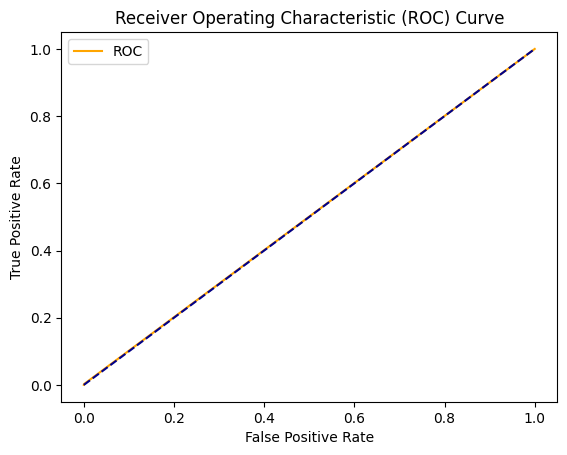

In [ ]:
probs = predict2
# probs = probs[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur(fper, tper)
# plt.savefig('rocb.png', dpi=300, bbox_inches='tight')

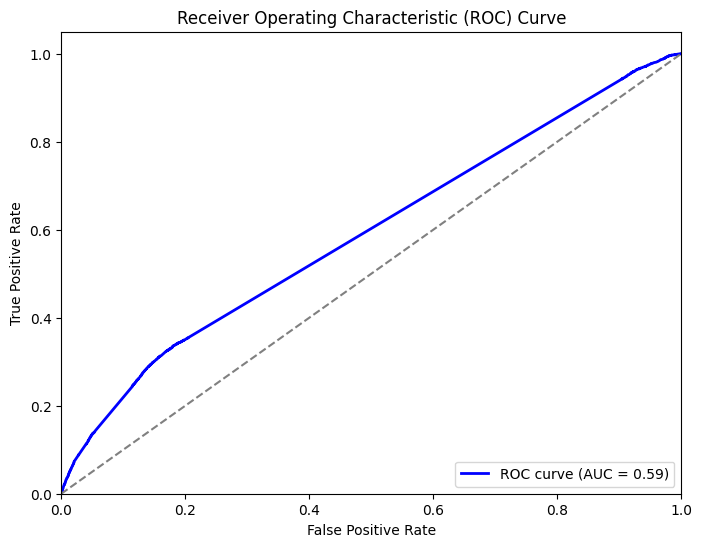

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

# Generate synthetic data
X=b.drop(columns=['SepsisLabel'])
y=b['SepsisLabel']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost classifier
bst = xgb.train(params, dtrain, num_round)

# Predict probabilities for the test set
y_probs = bst.predict(dtest)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
X_int=c.drop(['SepsisLabel'],axis=1).values
Y_int=c['SepsisLabel'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_int,Y_int, test_size=0.2,random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

steps = [
    ('imp', SimpleImputer(strategy="mean")),
    ('clf', XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=1))
]
pipeline = Pipeline(steps)



pipeline.fit(X_train, y_train)
predict3=pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.9880918484209994

In [ ]:
from sklearn.metrics import roc_auc_score
roc3=roc_auc_score(y_test,predict3)
roc3

0.7584618182825407

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = predict3
results = confusion_matrix(actual, predicted)
print("Confusion Matrix :")
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[154359    207]
 [  1675   1802]]
Accuracy Score : 0.9880918484209994
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    154566
           1       0.90      0.52      0.66      3477

    accuracy                           0.99    158043
   macro avg       0.94      0.76      0.83    158043
weighted avg       0.99      0.99      0.99    158043



In [ ]:
from sklearn.metrics import roc_curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('rocb.png', dpi=300, bbox_inches='tight')
    plt.show()


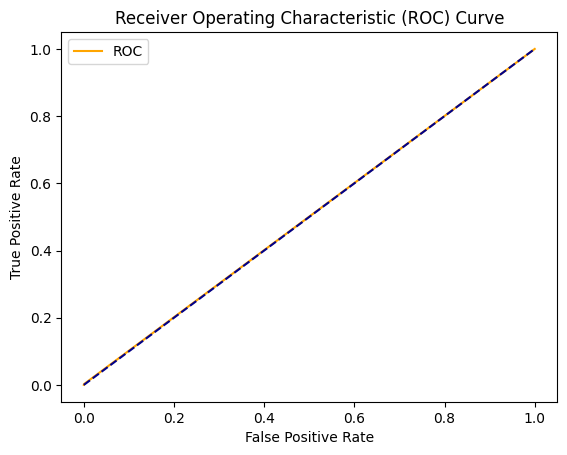

In [ ]:
probs = predict2
# probs = probs[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur(fper, tper)
# plt.savefig('rocb.png', dpi=300, bbox_inches='tight')

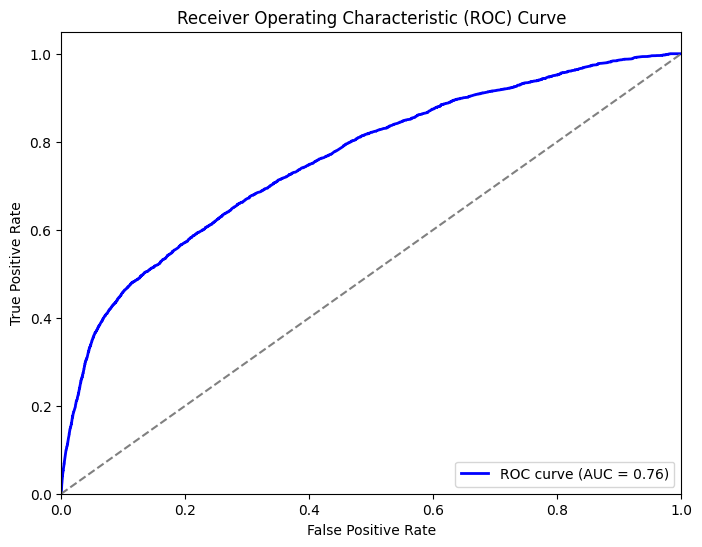

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

# Generate synthetic data
X=c.drop(columns=['SepsisLabel'])
y=c['SepsisLabel']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost classifier
bst = xgb.train(params, dtrain, num_round)

# Predict probabilities for the test set
y_probs = bst.predict(dtest)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**ab**

In [ ]:
X_int=ab.drop(['SepsisLabel'],axis=1).values
Y_int=ab['SepsisLabel'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_int,Y_int, test_size=0.2,random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

steps = [
    ('imp', SimpleImputer(strategy="mean")),
    ('clf', XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=1))
]
pipeline = Pipeline(steps)



pipeline.fit(X_train, y_train)
predict4=pipeline.predict(X_test)
pipeline.score(X_test, y_test)


0.9778161639553792

In [ ]:
from sklearn.metrics import roc_auc_score
roc3=roc_auc_score(y_test,predict4)
roc3

0.5032798032827523

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = predict4
results = confusion_matrix(actual, predicted)
print("Confusion Matrix :")
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[154513     53]
 [  3453     24]]
Accuracy Score : 0.9778161639553792
Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154566
           1       0.31      0.01      0.01      3477

    accuracy                           0.98    158043
   macro avg       0.64      0.50      0.50    158043
weighted avg       0.96      0.98      0.97    158043



In [ ]:
from sklearn.metrics import roc_curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('rocb.png', dpi=300, bbox_inches='tight')
    plt.show()

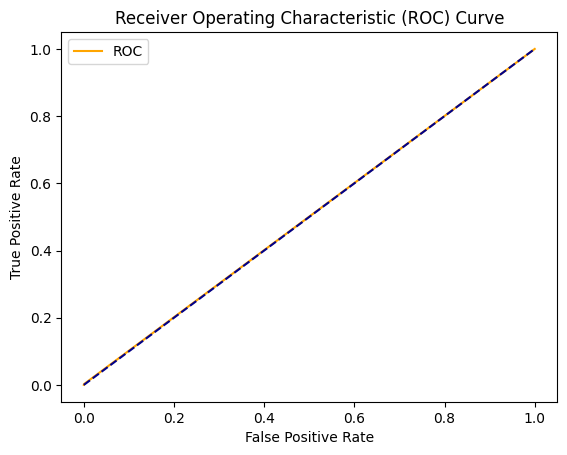

In [ ]:
probs = predict2
# probs = probs[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur(fper, tper)
# plt.savefig('rocb.png', dpi=300, bbox_inches='tight')

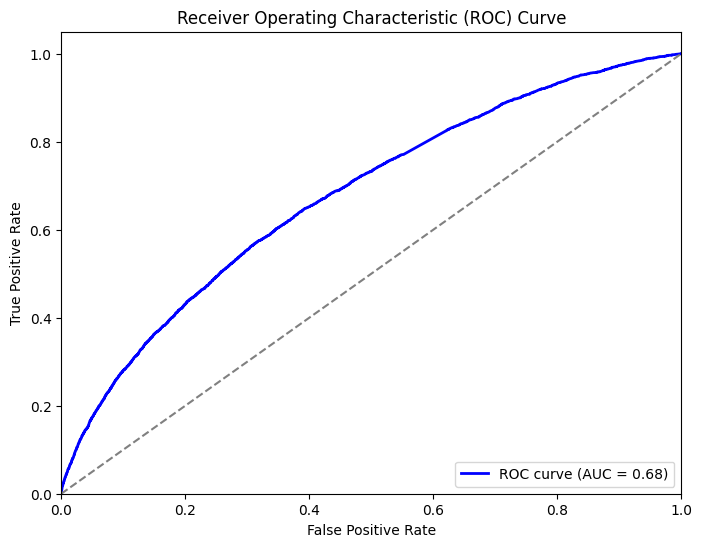

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

# Generate synthetic data
X=ab.drop(columns=['SepsisLabel'])
y=ab['SepsisLabel']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost classifier
bst = xgb.train(params, dtrain, num_round)

# Predict probabilities for the test set
y_probs = bst.predict(dtest)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()






In [ ]:
X_int=bc.drop(['SepsisLabel'],axis=1).values
Y_int=bc['SepsisLabel'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_int,Y_int, test_size=0.2,random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

steps = [
    ('imp', SimpleImputer(strategy="mean")),
    ('clf', XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=1))
]
pipeline = Pipeline(steps)



pipeline.fit(X_train, y_train)
predict4=pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.9839157697588631

In [ ]:
from sklearn.metrics import roc_auc_score
roc3=roc_auc_score(y_test,predict4)
roc3

0.6601787992825401

In [ ]:
print(y_test.shape)
predict4.shape

(237065,)


(158043,)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = predict4
results = confusion_matrix(actual, predicted)
print("Confusion Matrix :")
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[154383    183]
 [  2359   1118]]
Accuracy Score : 0.9839157697588631
Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154566
           1       0.86      0.32      0.47      3477

    accuracy                           0.98    158043
   macro avg       0.92      0.66      0.73    158043
weighted avg       0.98      0.98      0.98    158043



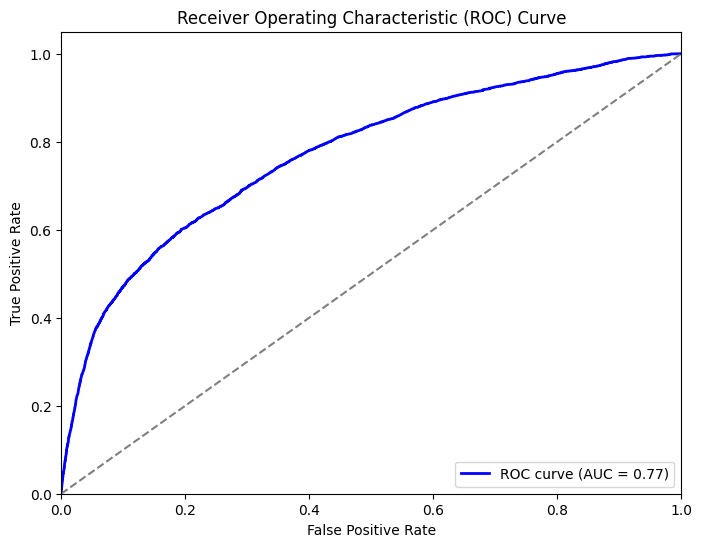

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

# Generate synthetic data
X=bc.drop(columns=['SepsisLabel'])
y=bc['SepsisLabel']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost classifier
bst = xgb.train(params, dtrain, num_round)

# Predict probabilities for the test set
y_probs = bst.predict(dtest)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('rocb.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
probs = predict4
# probs = probs[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur(fper, tper)
# plt.savefig('rocb.png', dpi=300, bbox_inches='tight')

ValueError: Found input variables with inconsistent numbers of samples: [237065, 158043]

In [ ]:
abc=data[['HR','O2Sat','SBP','MAP','DBP','Resp','BaseExcess','HCO3','FiO2', 'pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate','Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb',
        'PTT','WBC','Fibrinogen','Platelets','Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS','SepsisLabel']]

In [ ]:
X_int=abc.drop(['SepsisLabel'],axis=1).values
Y_int=abc['SepsisLabel'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_int,Y_int, test_size=0.2,random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

steps = [
    ('imp', SimpleImputer(strategy="mean")),
    ('clf', XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=1))
]
pipeline = Pipeline(steps)



pipeline.fit(X_train, y_train)
predict5=pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.9823275943888689

In [ ]:
y_test.shape
predict5.shape

(158043,)

In [ ]:
from sklearn.metrics import roc_auc_score
roc3=roc_auc_score(y_test,predict5)
roc3

ValueError: Found input variables with inconsistent numbers of samples: [237065, 158043]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = predict5
results = confusion_matrix(actual, predicted)
print("Confusion Matrix :")
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[154379    187]
 [  2606    871]]
Accuracy Score : 0.9823275943888689
Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154566
           1       0.82      0.25      0.38      3477

    accuracy                           0.98    158043
   macro avg       0.90      0.62      0.69    158043
weighted avg       0.98      0.98      0.98    158043



In [ ]:
from sklearn.metrics import roc_curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('rocb.png', dpi=300, bbox_inches='tight')
    plt.show()


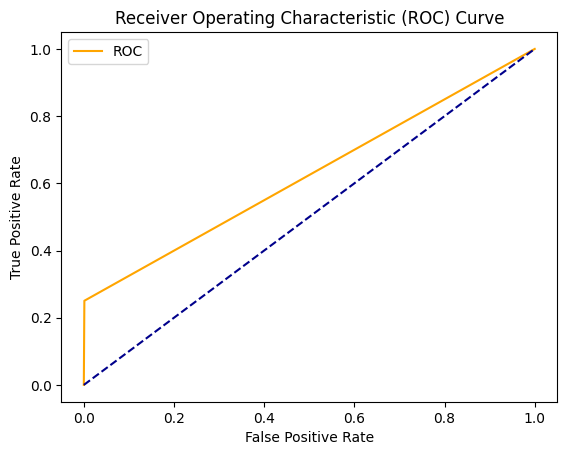

In [ ]:
probs = predict5
# probs = probs[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur(fper, tper)
# plt.savefig('rocb.png', dpi=300, bbox_inches='tight')

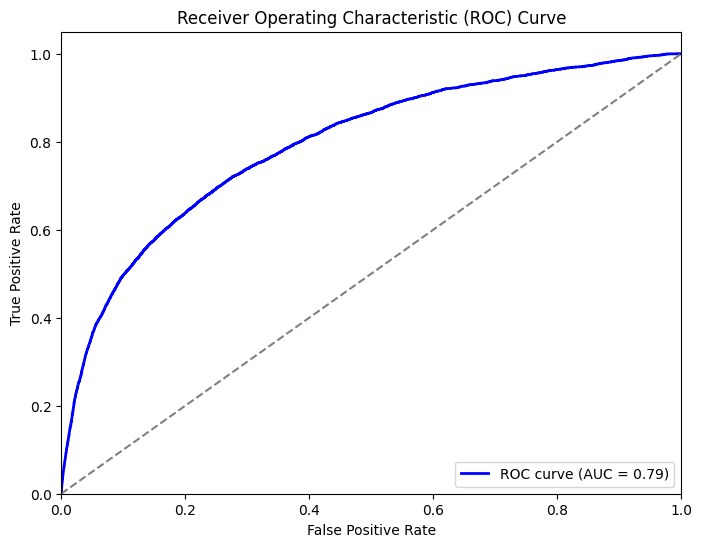

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

# Generate synthetic data
X=abc.drop(columns=['SepsisLabel'])
y=abc['SepsisLabel']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost classifier
bst = xgb.train(params, dtrain, num_round)

# Predict probabilities for the test set
y_probs = bst.predict(dtest)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
